<a href="https://colab.research.google.com/github/arashkhgit/DataScience-cheat-sheet/blob/main/update_of_Snapp!_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

chunk_size = 10000
data_chunks = pd.read_csv('/content/dataset_orders.csv', chunksize=chunk_size)
data = pd.concat(data_chunks)


# Data Cleaning and Preprocessing:



*   Handle missing data: Identify missing values and decide how to deal with them (e.g., impute, drop, or leave as-is).
*   Remove duplicate records, if any, to avoid skewing analysis results.
*   Address data inconsistencies, such as spelling errors, capitalization, or data entry mistakes.
*   Handle outliers if they exist and could influence the analysis.








### Step 1: Data Examination

In [ ]:
# Check the basic information of the data
print("Step 1: Data Information")
print(data.info())

Step 1: Data Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10224 entries, 0 to 10223
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   order_id      10224 non-null  int64  
 1   create_time   10224 non-null  object 
 2   category      10224 non-null  object 
 3   city          10224 non-null  object 
 4   customer_id   10224 non-null  int64  
 5   price         10224 non-null  int64  
 6   distance      10224 non-null  float64
 7   status        10224 non-null  object 
 8   cancelled_by  4421 non-null   object 
 9   biker_id      7014 non-null   float64
 10  accept_time   10223 non-null  object 
dtypes: float64(2), int64(3), object(6)
memory usage: 878.8+ KB
None


### Step 2: Missing Value Analysis

In [ ]:
# Check for missing values in each column
print("\nStep 2: Missing Values")
missing_values = data.isnull().sum()
print(missing_values)


Step 2: Missing Values
order_id           0
create_time        0
category           0
city               0
customer_id        0
price              0
distance           0
status             0
cancelled_by    5803
biker_id        3210
accept_time        1
dtype: int64


### Step 3: Data Cleaning

In [ ]:
# Step 3.1: Convert date columns to proper datetime format
data['create_time'] = pd.to_datetime(data['create_time'])
data['accept_time'] = pd.to_datetime(data['accept_time'])

# Step 3.2: Convert 'price' and 'Distance' columns to numeric (if they contain numeric values)
data['price'] = pd.to_numeric(data['price'], errors='coerce')
data['distance'] = pd.to_numeric(data['distance'], errors='coerce')

# Step 3.3: Handle missing values in 'biker_id'
# Since 'biker_id' is empty when the order is not accepted, let's fill it with a more appropriate value, such as 'NOT_ACCEPTED'
data['biker_id'].fillna('NOT_ACCEPTED', inplace=True)

# Step 3.4: Handle missing values in 'cancelled_by'
# Fill missing values in 'cancelled_by' with "UNKNOWN"
data['cancelled_by'].fillna("UNKNOWN", inplace=True)

### Step 4: Data Preprocessing

In [ ]:
# Step 4.1: Convert text columns to lowercase
data['category'] = data['category'].str.lower()
data['city'] = data['city'].str.lower()
data['status'] = data['status'].str.lower()
data['cancelled_by'] = data['cancelled_by'].str.lower()

# Step 4.2: Remove duplicate rows, if any
data.drop_duplicates(inplace=True)

# Step 4.3: Convert 'order_id', 'customer_id', and 'biker_id' to integers
data['order_id'] = data['order_id'].astype(int)
data['customer_id'] = data['customer_id'].astype(int)

In [ ]:
missing_values = data.isnull().sum()
print(missing_values)

order_id        0
create_time     0
category        0
city            0
customer_id     0
price           0
distance        0
status          0
cancelled_by    0
biker_id        0
accept_time     1
dtype: int64


### Step 4: Exploratory Data Analysis (EDA)

In [ ]:
# Step 4.1: Summary Statistics
print("\nStep 4.1: Summary Statistics")
print(data.describe())

# Step 4.2: Category-wise Analysis
print("\nStep 4.2: Category-wise Analysis")
category_counts = data['category'].value_counts()
print(category_counts)

# Step 4.3: City-wise Analysis
print("\nStep 4.3: City-wise Analysis")
city_counts = data['city'].value_counts()
print(city_counts)

# Step 4.4: Status-wise Analysis
print("\nStep 4.4: Status-wise Analysis")
status_counts = data['status'].value_counts()
print(status_counts)

# Step 4.5: Cancellation Reasons Analysis
print("\nStep 4.5: Cancellation Reasons Analysis")
cancelled_by_counts = data['cancelled_by'].value_counts()
print(cancelled_by_counts)

# Step 4.6: Price and Distance Analysis
print("\nStep 4.6: Price and Distance Analysis")
print("Average Price:", data['price'].mean())
print("Maximum Price:", data['price'].max())
print("Minimum Price:", data['price'].min())
print("Average Distance:", data['distance'].mean())
print("Maximum Distance:", data['distance'].max())
print("Minimum Distance:", data['distance'].min())


Step 4.1: Summary Statistics
           order_id   customer_id         price      distance
count  1.022400e+04  1.022400e+04  1.022400e+04  10224.000000
mean   9.004396e+07  7.078800e+05  1.614040e+05      8.962339
std    5.754013e+06  2.005058e+06  1.769089e+05      8.510052
min    8.000365e+07  1.000000e+00  1.000000e+04      0.000000
25%    8.511818e+07  1.000000e+00  6.000000e+04      3.429225
50%    9.003456e+07  1.000000e+00  1.000000e+05      6.782000
75%    9.505070e+07  2.000000e+00  1.850000e+05     11.836207
max    9.999927e+07  7.997330e+06  1.805000e+06    164.213000

Step 4.2: Category-wise Analysis
bwb     5845
pass    2025
vn      1119
bik     1094
car       75
vn_h      66
Name: category, dtype: int64

Step 4.3: City-wise Analysis
tehran     4120
isfahan    1356
mashhad    1297
shiraz     1245
qom         692
ahvaz       586
karaj       574
tabriz      236
kerman       75
yazd         43
Name: city, dtype: int64

Step 4.4: Status-wise Analysis
delivered    5768
cancel

### Step 5: Data Visualization

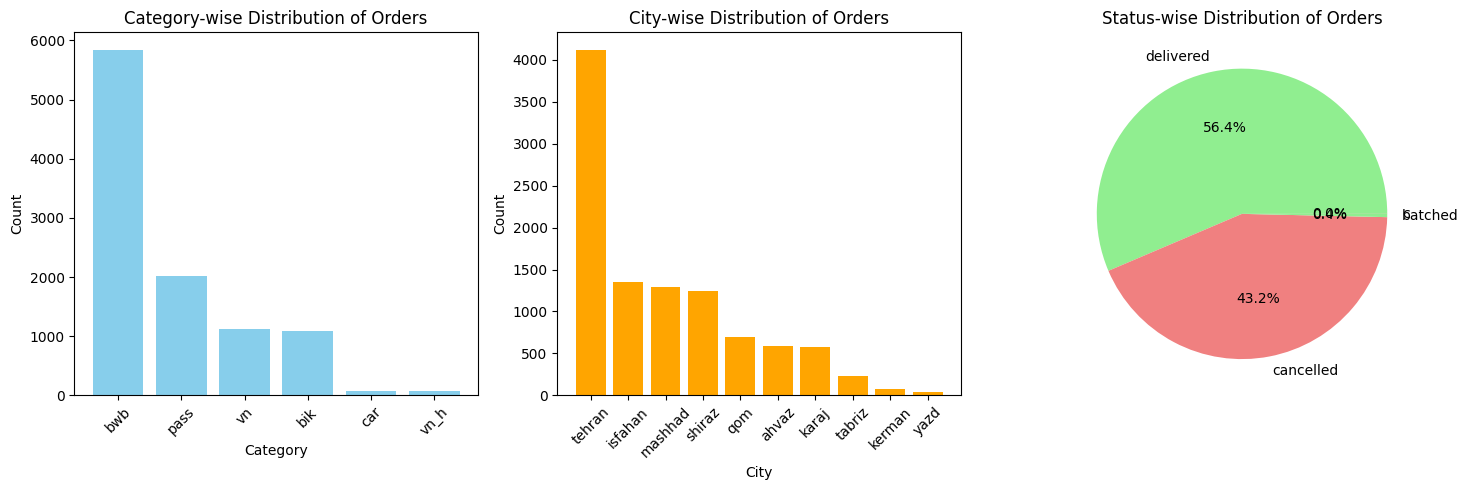

In [ ]:
# Create a figure with 3 subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Category-wise Bar Plot
axs[0].bar(category_counts.index, category_counts.values, color='skyblue')
axs[0].set_xlabel('Category')
axs[0].set_ylabel('Count')
axs[0].set_title('Category-wise Distribution of Orders')
axs[0].tick_params(axis='x', rotation=45)

# City-wise Bar Plot
axs[1].bar(city_counts.index, city_counts.values, color='orange')
axs[1].set_xlabel('City')
axs[1].set_ylabel('Count')
axs[1].set_title('City-wise Distribution of Orders')
axs[1].tick_params(axis='x', rotation=45)

# Status Pie Chart
axs[2].pie(status_counts.values, labels=status_counts.index, autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
axs[2].set_title('Status-wise Distribution of Orders')

# Adjust layout and display the combined chart
plt.tight_layout()
plt.show()

<ipython-input-10-5a99fc297238>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


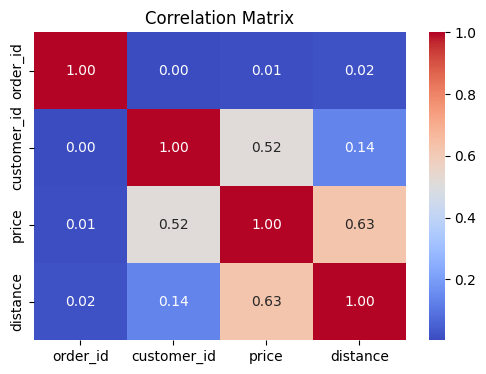

In [ ]:
# Correlation Matrix and Heatmap
correlation_matrix = data.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

### Step 6: Data validation

Data validation is a critical step to ensure that the data cleaning and preprocessing have been performed correctly and that the data meets quality standards. In this process, we will cross-check the preprocessed data against the original data or known data to verify its correctness. Let's perform data validation for your preprocessed data:

In [ ]:
# Step 0: Load the original data into a DataFrame
chunk_size = 10000
data_chunks = pd.read_csv('/content/dataset_orders.csv', chunksize=chunk_size)
original_data = pd.concat(data_chunks)

# Save the preprocessed data to a CSV file
data.to_csv('/content/preprocessed_data.csv', index=False)

# Read the preprocessed data from the saved CSV file
preprocessed_data = pd.read_csv('/content/preprocessed_data.csv')

In [ ]:
# Step 6.1: Compare the number of rows in original and preprocessed data
original_rows, original_cols = original_data.shape
preprocessed_rows, preprocessed_cols = preprocessed_data.shape

if original_rows == preprocessed_rows:
    print("Step 6.1: Number of rows in original and preprocessed data match.")
else:
    print("Step 6.1: Number of rows in original and preprocessed data do not match. Check for potential issues.")

# Step 6.2: Compare the columns in original and preprocessed data
original_columns = set(original_data.columns)
preprocessed_columns = set(preprocessed_data.columns)

if original_columns == preprocessed_columns:
    print("Step 6.2: Columns in original and preprocessed data match.")
else:
    print("Step 6.2: Columns in original and preprocessed data do not match. Check for potential issues.")

# Step 6.3: Check for any missing values in preprocessed data
missing_values_preprocessed = preprocessed_data.isnull().sum().sum()

if missing_values_preprocessed == 0:
    print("Step 6.3: No missing values in the preprocessed data.")
else:
    print(f"Step 6.3: Preprocessed data contains {missing_values_preprocessed} missing values.")

# Step 6.4: Verify data transformation and cleaning results for specific columns
# (You can cross-check specific columns if needed)

# Example: Verify the uniqueness of 'order_id' in the preprocessed data
if preprocessed_data['order_id'].nunique() == preprocessed_rows:
    print("Step 6.4: 'order_id' is unique in the preprocessed data.")
else:
    print("Step 6.4: 'order_id' is not unique in the preprocessed data. Check for potential issues.")


Step 6.1: Number of rows in original and preprocessed data match.
Step 6.2: Columns in original and preprocessed data match.
Step 6.3: Preprocessed data contains 1 missing values.
Step 6.4: 'order_id' is unique in the preprocessed data.


# Data Analysis Plan
*   Define our objectve and questions
*   Plan the analysis process and the techniques




**Our first objective is that find "Average order Time for Each Category"**  :

In [ ]:
# Step 0: Load the preprocessed data into a DataFrame
chunk_size = 10000
data_chunks = pd.read_csv('/content/preprocessed_data.csv', chunksize=chunk_size)
data = pd.concat(data_chunks)

# Step 1: Data Cleaning (already performed in the previous steps)

# Step 2: Calculate the average time for each category

# Convert 'create_time' and 'accept_time' to datetime objects
data['create_time'] = pd.to_datetime(data['create_time'])
data['accept_time'] = pd.to_datetime(data['accept_time'])

# Filter out rows where 'accept_time' is before 'create_time'
valid_data = data[data['accept_time'] >= data['create_time']].copy()

# Calculate the time difference between 'create_time' and 'accept_time' in minutes for valid data
valid_data['time_difference'] = (valid_data['accept_time'] - valid_data['create_time']).dt.total_seconds() / 60

# Group the valid data by 'category' and calculate the average time difference for each category
average_time_per_category = valid_data.groupby('category')['time_difference'].mean()

# Convert the average time in minutes to minutes and seconds format
average_time_per_category = pd.to_datetime(average_time_per_category, unit='m').dt.strftime('%M:%S')

print("Average order Time for Each Category (minutes:seconds):")
print(average_time_per_category)

Average order Time for Each Category (minutes:seconds):
category
bik     02:56
bwb     00:56
car     04:50
pass    00:39
vn      01:04
vn_h    03:00
Name: time_difference, dtype: object


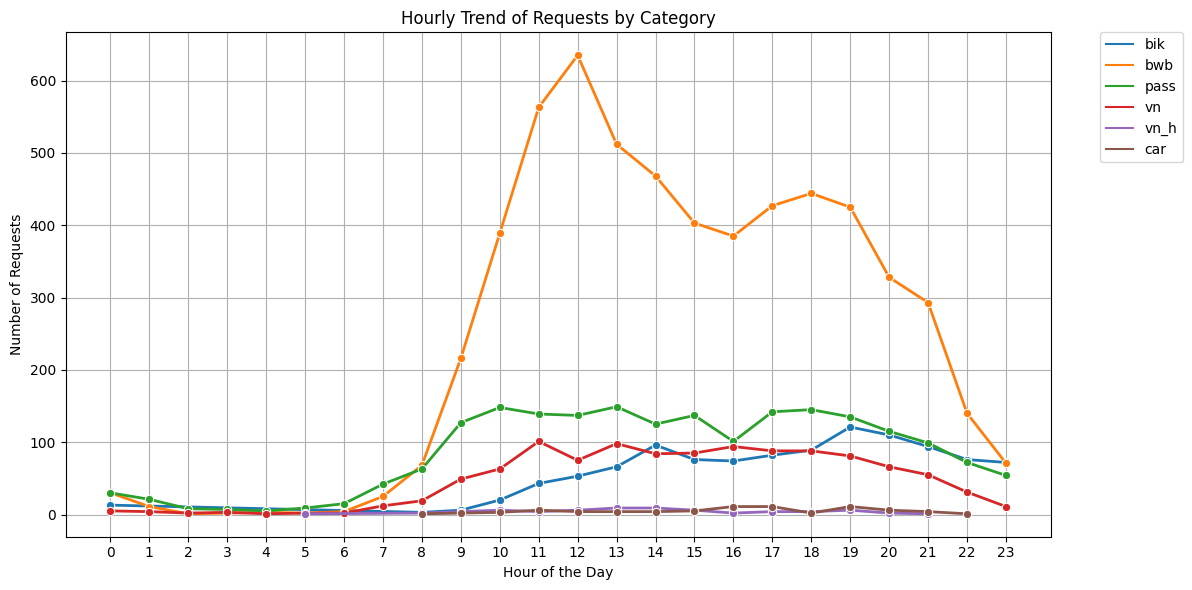

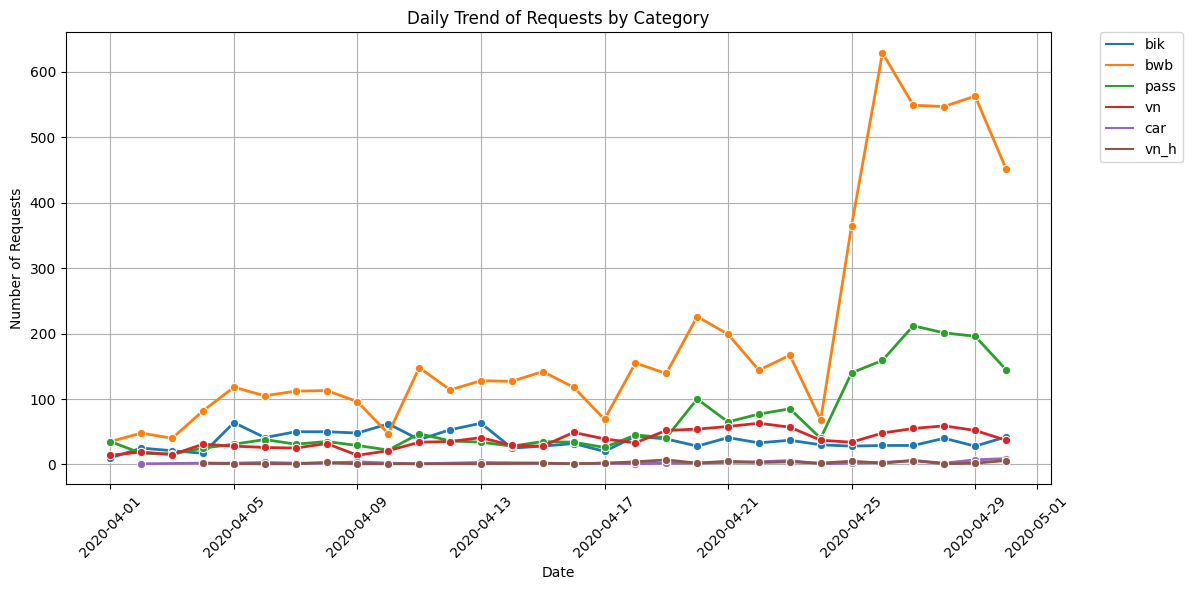

In [ ]:
# Step 0: Load the preprocessed data into a DataFrame
chunk_size = 10000
data_chunks = pd.read_csv('/content/preprocessed_data.csv', chunksize=chunk_size)
data = pd.concat(data_chunks)

# Step 1: Data Cleaning (already performed in the previous steps)

# Step 2: Data Preparation for Hourly Trend Plot

# Convert 'create_time' to datetime object
data['create_time'] = pd.to_datetime(data['create_time'])

# Extract hour from 'create_time' to create a new 'hour' column
data['hour'] = data['create_time'].dt.hour

# Step 3: Data Preparation for Daily Trend Plot

# Extract date from 'create_time' to create a new 'date' column
data['date'] = data['create_time'].dt.date

# Step 4: Hourly Trend Plot

# Group the data by 'hour' and 'category' to get the count of requests for each hour in each category
hourly_count_per_category = data.groupby(['hour', 'category']).size().reset_index(name='count')

# Plot the hourly trend for each category
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_count_per_category, x='hour', y='count', hue='category', marker='o', linewidth=2)
plt.title('Hourly Trend of Requests by Category')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Requests')
plt.xticks(range(24))
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.show()

# Step 5: Daily Trend Plot

# Group the data by 'date' and 'category' to get the count of requests for each day in each category
daily_count_per_category = data.groupby(['date', 'category']).size().reset_index(name='count')

# Plot the daily trend for each category
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_count_per_category, x='date', y='count', hue='category', marker='o', linewidth=2)
plt.title('Daily Trend of Requests by Category')
plt.xlabel('Date')
plt.ylabel('Number of Requests')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.show()

In [ ]:
# Step 0: Load the preprocessed data into a DataFrame
chunk_size = 10000
data_chunks = pd.read_csv('/content/preprocessed_data.csv', chunksize=chunk_size)
data = pd.concat(data_chunks)

# Step 1: Data Cleaning (already performed in the previous steps)

# Step 2: Data Preparation for Hourly Trend Plot

# Convert 'create_time' to datetime object
data['create_time'] = pd.to_datetime(data['create_time'])

# Extract hour from 'create_time' to create a new 'hour' column
data['hour'] = data['create_time'].dt.hour

# Step 3: Data Preparation for Daily Trend Plot

# Extract date from 'create_time' to create a new 'date' column
data['date'] = data['create_time'].dt.date

# Step 4: Hourly Trend Outlier Detection (Z-score method)

hourly_count_per_category = data.groupby(['hour', 'category']).size().reset_index(name='count')

# Calculate Z-score for 'count' column within each category
hourly_count_per_category['z_score'] = (hourly_count_per_category.groupby('category')['count']
                                       .transform(lambda x: (x - x.mean()) / x.std()))

# Identify potential outliers with Z-score > 3 or Z-score < -3
hourly_outliers_zscore = hourly_count_per_category[(hourly_count_per_category['z_score'] > 3) |
                                                   (hourly_count_per_category['z_score'] < -3)]

print("Hourly Trend Outliers (Z-score method):")
print(hourly_outliers_zscore)

# Step 5: Daily Trend Outlier Detection (Z-score method)

daily_count_per_category = data.groupby(['date', 'category']).size().reset_index(name='count')

# Calculate Z-score for 'count' column within each category
daily_count_per_category['z_score'] = (daily_count_per_category.groupby('category')['count']
                                      .transform(lambda x: (x - x.mean()) / x.std()))

# Identify potential outliers with Z-score > 3 or Z-score < -3
daily_outliers_zscore = daily_count_per_category[(daily_count_per_category['z_score'] > 3) |
                                                 (daily_count_per_category['z_score'] < -3)]

print("Daily Trend Outliers (Z-score method):")
print(daily_outliers_zscore)

# Step 6: Hourly Trend Outlier Detection (IQR method)

# Calculate the first quartile (Q1), third quartile (Q3), and interquartile range (IQR) for 'count' within each category
hourly_summary_iqr = (hourly_count_per_category.groupby('category')['count']
                      .agg(['quantile', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)])
                      .rename(columns={'<lambda_0>': 'Q1', '<lambda_1>': 'Q3', 'quantile': 'median'}))

# Calculate the lower and upper bounds for potential outliers
hourly_summary_iqr['lower_bound'] = hourly_summary_iqr['Q1'] - 1.5 * (hourly_summary_iqr['Q3'] - hourly_summary_iqr['Q1'])
hourly_summary_iqr['upper_bound'] = hourly_summary_iqr['Q3'] + 1.5 * (hourly_summary_iqr['Q3'] - hourly_summary_iqr['Q1'])

# Identify potential outliers based on the bounds
hourly_outliers_iqr = pd.merge(hourly_count_per_category, hourly_summary_iqr[['lower_bound', 'upper_bound']],
                              on='category', how='left')
hourly_outliers_iqr = hourly_outliers_iqr[
    (hourly_outliers_iqr['count'] < hourly_outliers_iqr['lower_bound']) |
    (hourly_outliers_iqr['count'] > hourly_outliers_iqr['upper_bound'])
]

print("Hourly Trend Outliers (IQR method):")
print(hourly_outliers_iqr)

# Step 7: Daily Trend Outlier Detection (IQR method)

# Calculate the first quartile (Q1), third quartile (Q3), and interquartile range (IQR) for 'count' within each category
daily_summary_iqr = (daily_count_per_category.groupby('category')['count']
                     .agg(['quantile', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)])
                     .rename(columns={'<lambda_0>': 'Q1', '<lambda_1>': 'Q3', 'quantile': 'median'}))

# Calculate the lower and upper bounds for potential outliers
daily_summary_iqr['lower_bound'] = daily_summary_iqr['Q1'] - 1.5 * (daily_summary_iqr['Q3'] - daily_summary_iqr['Q1'])
daily_summary_iqr['upper_bound'] = daily_summary_iqr['Q3'] + 1.5 * (daily_summary_iqr['Q3'] - daily_summary_iqr['Q1'])

# Identify potential outliers based on the bounds
daily_outliers_iqr = pd.merge(daily_count_per_category, daily_summary_iqr[['lower_bound', 'upper_bound']],
                             on='category', how='left')
daily_outliers_iqr = daily_outliers_iqr[
    (daily_outliers_iqr['count'] < daily_outliers_iqr['lower_bound']) |
    (daily_outliers_iqr['count'] > daily_outliers_iqr['upper_bound'])
]

print("Daily Trend Outliers (IQR method):")
print(daily_outliers_iqr)


Hourly Trend Outliers (Z-score method):
Empty DataFrame
Columns: [hour, category, count, z_score]
Index: []
Daily Trend Outliers (Z-score method):
           date category  count   z_score
167  2020-04-30      car      9  3.017909
Hourly Trend Outliers (IQR method):
Empty DataFrame
Columns: [hour, category, count, z_score, lower_bound, upper_bound]
Index: []
Daily Trend Outliers (IQR method):
           date category  count   z_score  lower_bound  upper_bound
125  2020-04-23      car      6  1.537425        0.500        4.500
136  2020-04-25      bwb    365  0.977403      -40.875      330.125
142  2020-04-26      bwb    629  2.493765      -40.875      330.125
148  2020-04-27      bwb    549  2.034261      -40.875      330.125
149  2020-04-27      car      6  1.537425        0.500        4.500
150  2020-04-27     pass    212  2.430819      -47.000      161.000
154  2020-04-28      bwb    547  2.022774      -40.875      330.125
156  2020-04-28     pass    201  2.245774      -47.000      

# Next Objective :
we want to predict the number of orders (DELIVERED) in the future.
How many trips will we have on each day of the first week
of May?

# ARIMA

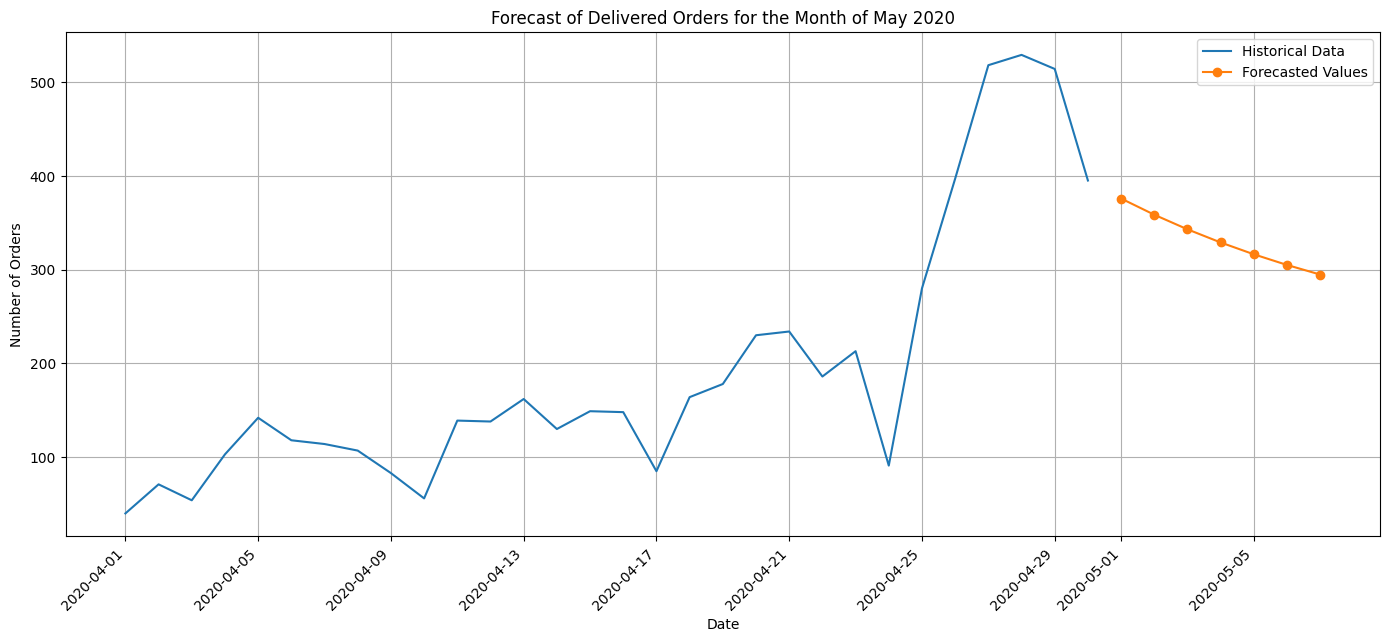

Forecasted Number of Orders for the Month of May 2020:
2020-05-01    375.804401
2020-05-02    358.518157
2020-05-03    342.951348
2020-05-04    328.932945
2020-05-05    316.308929
2020-05-06    304.940603
2020-05-07    294.703067
Freq: D, Name: predicted_mean, dtype: float64


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Step 0: Load the preprocessed data into a DataFrame
chunk_size = 10000
data_chunks = pd.read_csv('/content/preprocessed_data.csv', chunksize=chunk_size)
data = pd.concat(data_chunks)

# Step 1: Data Preparation

# Convert 'create_time' to datetime object
data['create_time'] = pd.to_datetime(data['create_time'])

# Filter only the delivered orders
delivered_data = data[data['status'] == 'delivered']

# Set 'create_time' as the index to convert the DataFrame into a time series
delivered_data.set_index('create_time', inplace=True)

# Step 2: Resample the Data on a Daily Basis

# Resample the data on a daily basis and get the count of delivered orders for each day
daily_orders = delivered_data.resample('D').size()

# Step 3: Train the ARIMA Model for Historical Data

# Select the historical data for April 2020
historical_data = daily_orders['2020-04-01':'2020-04-30']

# Check if the historical data is sufficient for model training
if len(historical_data) < 2:
    print("Insufficient data for model training. Please ensure data includes at least two days of historical data.")
else:
    # Train the ARIMA model on the historical data
    try:
        arima_model = ARIMA(historical_data, order=(1, 0, 0))  # You can modify the order as needed
        arima_model_fit = arima_model.fit()

        # Step 4: Forecasting for the Month of May 2020

        # Generate the dates for the month of May 2020
        forecast_start_date = pd.to_datetime('2020-05-01')
        forecast_end_date = pd.to_datetime('2020-05-7')
        forecast_dates = pd.date_range(start=forecast_start_date, end=forecast_end_date, freq='D')

        # Use the trained ARIMA model to forecast the number of orders for the month of May 2020
        forecast_values = arima_model_fit.forecast(steps=len(forecast_dates))

        # Plot the forecasted values
        plt.figure(figsize=(14, 6))
        plt.plot(historical_data.index, historical_data.values, label='Historical Data')
        plt.plot(forecast_dates, forecast_values, label='Forecasted Values', marker='o')
        plt.title('Forecast of Delivered Orders for the Month of May 2020')
        plt.xlabel('Date')
        plt.ylabel('Number of Orders')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.xticks(rotation=45, ha='right')  # Rotate date labels for readability
        plt.show()

        print("Forecasted Number of Orders for the Month of May 2020:")
        print(forecast_values)

    except Exception as e:
        print("Error occurred during ARIMA model training:", str(e))

# Additional comments:
# - The code now uses "delivered" instead of "DELIVERED" for consistency.
# - The code includes historical data for April 2020 and uses ARIMA to forecast the number of orders for May 2020.
# - The forecasted values for the month of May 2020 are displayed and plotted in the chart.


# Seasonal Autoregressive Integrated Moving-Average (SARIMA)
SARIMA is an extension of ARIMA that considers seasonal components in addition to autoregressive and moving-average components. It is useful for time series data with seasonality.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


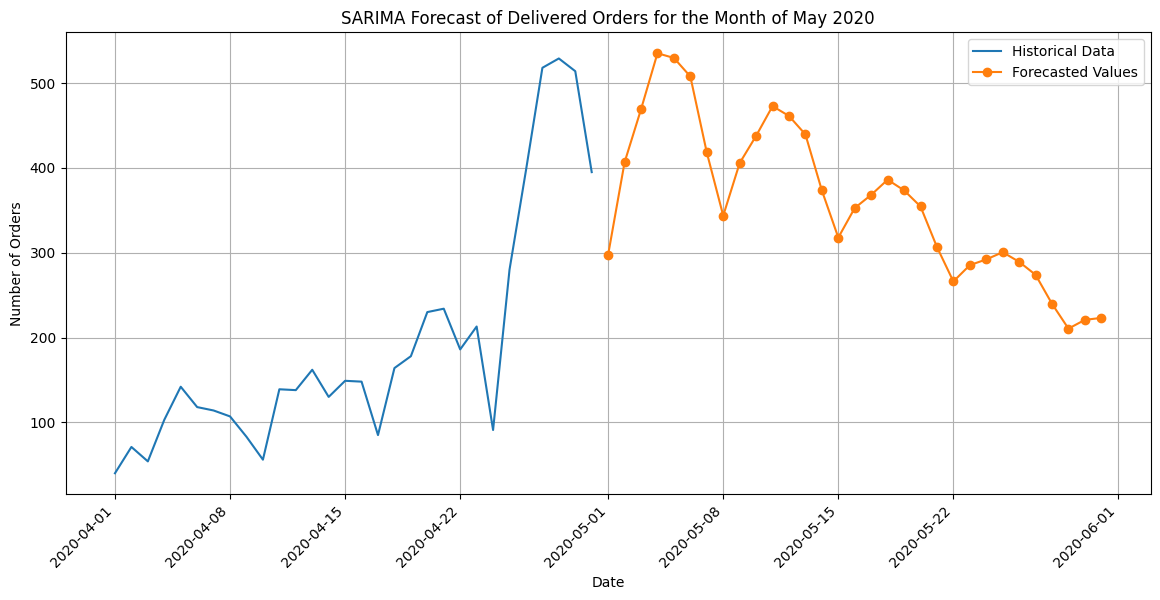

SARIMA Forecasted Number of Orders for the Month of May 2020:
2020-05-01    297.758524
2020-05-02    406.637515
2020-05-03    469.092362
2020-05-04    535.153225
2020-05-05    529.607987
2020-05-06    507.769116
2020-05-07    418.163649
2020-05-08    343.638655
2020-05-09    405.675650
2020-05-10    437.753317
2020-05-11    472.808731
2020-05-12    461.222850
2020-05-13    439.420244
2020-05-14    373.435646
2020-05-15    317.848993
2020-05-16    352.709949
2020-05-17    368.220509
2020-05-18    386.066251
2020-05-19    373.514021
2020-05-20    354.551697
2020-05-21    306.768136
2020-05-22    266.122056
2020-05-23    285.362979
2020-05-24    292.095277
2020-05-25    300.597626
2020-05-26    289.277293
2020-05-27    273.932702
2020-05-28    239.777273
2020-05-29    210.502351
2020-05-30    220.868494
2020-05-31    223.142128
Freq: D, Name: predicted_mean, dtype: float64


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Step 0: Load the preprocessed data into a DataFrame
chunk_size = 10000
data_chunks = pd.read_csv('/content/preprocessed_data.csv', chunksize=chunk_size)
data = pd.concat(data_chunks)

# Step 1: Data Preparation

# Convert 'create_time' to datetime object
data['create_time'] = pd.to_datetime(data['create_time'])

# Filter only the delivered orders
delivered_data = data[data['status'] == 'delivered']

# Set 'create_time' as the index to convert the DataFrame into a time series
delivered_data.set_index('create_time', inplace=True)

# Step 2: Resample the Data on a Daily Basis

# Resample the data on a daily basis and get the count of delivered orders for each day
daily_orders = delivered_data.resample('D').size()

# Step 3: Train the SARIMA Model for Historical Data

# Select the historical data for April 2020
historical_data = daily_orders['2020-04-01':'2020-04-30']

# Check if the historical data is sufficient for model training
if len(historical_data) < 2:
    print("Insufficient data for model training. Please ensure data includes at least two days of historical data.")
else:
    # Train the SARIMA model on the historical data
    try:
        sarima_model = SARIMAX(historical_data, order=(1, 0, 0), seasonal_order=(1, 0, 0, 7))  # You can modify the order as needed
        sarima_model_fit = sarima_model.fit()

        # Step 4: Forecasting for the Month of May 2020

        # Generate the dates for the month of May 2020
        forecast_start_date = pd.to_datetime('2020-05-01')
        forecast_end_date = pd.to_datetime('2020-05-31')
        forecast_dates = pd.date_range(start=forecast_start_date, end=forecast_end_date, freq='D')

        # Use the trained SARIMA model to forecast the number of orders for the month of May 2020
        forecast_values = sarima_model_fit.forecast(steps=len(forecast_dates))

        # Plot the forecasted values
        plt.figure(figsize=(14, 6))
        plt.plot(historical_data.index, historical_data.values, label='Historical Data')
        plt.plot(forecast_dates, forecast_values, label='Forecasted Values', marker='o')
        plt.title('SARIMA Forecast of Delivered Orders for the Month of May 2020')
        plt.xlabel('Date')
        plt.ylabel('Number of Orders')
        plt.legend()
        plt.grid(True)
        plt.xticks(rotation=45, ha='right')  # Rotate date labels for readability
        plt.show()

        print("SARIMA Forecasted Number of Orders for the Month of May 2020:")
        print(forecast_values)

    except Exception as e:
        print("Error occurred during SARIMA model training:", str(e))


# Exponential Smoothing (ETS):
ETS methods are based on weighted averages of past observations to make predictions. They can handle data with or without seasonality and trend.

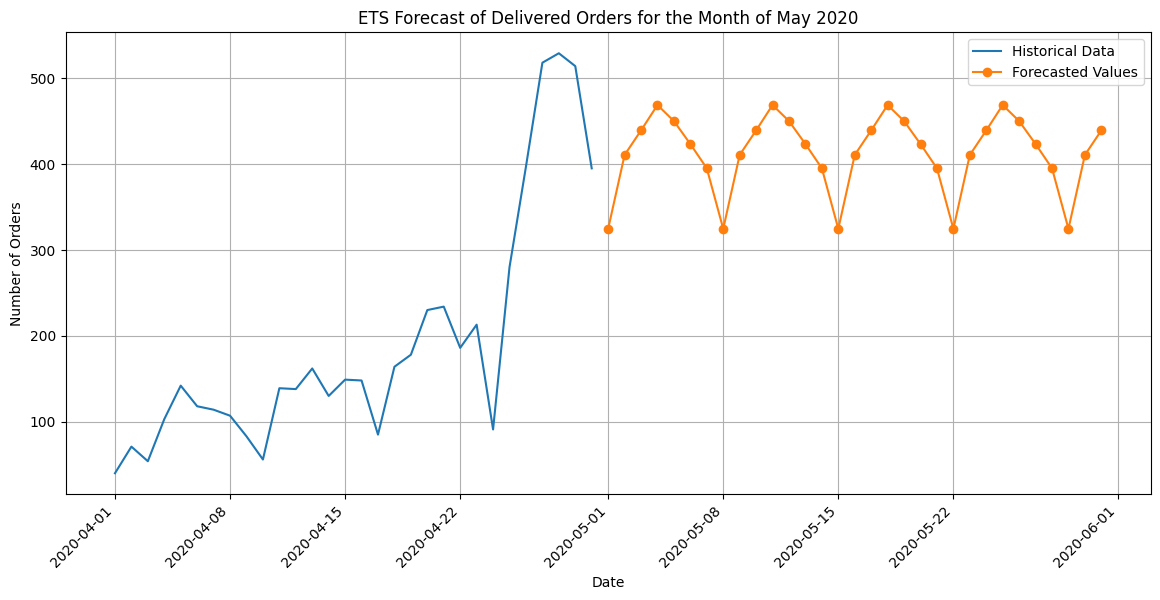

ETS Forecasted Number of Orders for the Month of May 2020:
2020-05-01    324.627222
2020-05-02    410.577225
2020-05-03    439.158391
2020-05-04    468.742514
2020-05-05    450.016637
2020-05-06    423.300910
2020-05-07    395.062852
2020-05-08    324.627222
2020-05-09    410.577225
2020-05-10    439.158391
2020-05-11    468.742514
2020-05-12    450.016637
2020-05-13    423.300910
2020-05-14    395.062852
2020-05-15    324.627222
2020-05-16    410.577225
2020-05-17    439.158391
2020-05-18    468.742514
2020-05-19    450.016637
2020-05-20    423.300910
2020-05-21    395.062852
2020-05-22    324.627222
2020-05-23    410.577225
2020-05-24    439.158391
2020-05-25    468.742514
2020-05-26    450.016637
2020-05-27    423.300910
2020-05-28    395.062852
2020-05-29    324.627222
2020-05-30    410.577225
2020-05-31    439.158391
Freq: D, dtype: float64


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Step 0: Load the preprocessed data into a DataFrame
chunk_size = 10000
data_chunks = pd.read_csv('/content/preprocessed_data.csv', chunksize=chunk_size)
data = pd.concat(data_chunks)

# Step 1: Data Preparation

# Convert 'create_time' to datetime object
data['create_time'] = pd.to_datetime(data['create_time'])

# Filter only the delivered orders
delivered_data = data[data['status'] == 'delivered']

# Set 'create_time' as the index to convert the DataFrame into a time series
delivered_data.set_index('create_time', inplace=True)

# Step 2: Resample the Data on a Daily Basis

# Resample the data on a daily basis and get the count of delivered orders for each day
daily_orders = delivered_data.resample('D').size()

# Step 3: Train the ETS Model for Historical Data

# Select the historical data for April 2020
historical_data = daily_orders['2020-04-01':'2020-04-30']

# Check if the historical data is sufficient for model training
if len(historical_data) < 2:
    print("Insufficient data for model training. Please ensure data includes at least two days of historical data.")
else:
    # Train the ETS model on the historical data
    try:
        ets_model = ExponentialSmoothing(historical_data, seasonal='add', seasonal_periods=7)
        ets_model_fit = ets_model.fit()

        # Step 4: Forecasting for the Month of May 2020

        # Generate the dates for the month of May 2020
        forecast_start_date = pd.to_datetime('2020-05-01')
        forecast_end_date = pd.to_datetime('2020-05-31')
        forecast_dates = pd.date_range(start=forecast_start_date, end=forecast_end_date, freq='D')

        # Use the trained ETS model to forecast the number of orders for the month of May 2020
        forecast_values = ets_model_fit.forecast(len(forecast_dates))

        # Plot the forecasted values
        plt.figure(figsize=(14, 6))
        plt.plot(historical_data.index, historical_data.values, label='Historical Data')
        plt.plot(forecast_dates, forecast_values, label='Forecasted Values', marker='o')
        plt.title('ETS Forecast of Delivered Orders for the Month of May 2020')
        plt.xlabel('Date')
        plt.ylabel('Number of Orders')
        plt.legend()
        plt.grid(True)
        plt.xticks(rotation=45, ha='right')  # Rotate date labels for readability
        plt.show()

        print("ETS Forecasted Number of Orders for the Month of May 2020:")
        print(forecast_values)

    except Exception as e:
        print("Error occurred during ETS model training:", str(e))


Prophet: Prophet is a forecasting library developed by Facebook that is designed to handle time series data with strong seasonality and multiple seasonal components.

Machine Learning Algorithms: You can also explore machine learning algorithms like Random Forests, Gradient Boosting, or LSTM (Long Short-Term Memory) networks, which are capable of learning complex patterns in time series data.

State Space Models: State space models can be used to capture both observed and unobserved components of time series data. Kalman filter-based methods are commonly used in state space models.

Gaussian Processes: Gaussian Processes are a powerful non-parametric approach for time series forecasting that can model uncertainty and handle irregularly spaced data.

# Find the cancellation rate

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Step 0: Load the preprocessed data into a DataFrame
chunk_size = 10000
data_chunks = pd.read_csv('/content/preprocessed_data.csv', chunksize=chunk_size)
data = pd.concat(data_chunks)

# Step 1: Replace 'CANCELLED' with 'cancelled'

data['status'] = data['status'].replace('CANCELLED', 'cancelled')

# Step 2: Calculate the Cancellation Rate

# Calculate the total number of orders
total_orders = data['order_id'].nunique()

# Calculate the number of cancelled orders
cancelled_orders = data[data['status'] == 'cancelled']['order_id'].nunique()

# Calculate the cancellation rate
cancellation_rate = cancelled_orders / total_orders * 100

print("Cancellation Rate: {:.2f}%".format(cancellation_rate))

# Step 3: Analyze the Reasons for Cancellations

# Group data by 'cancelled_by' to count cancellations by each category
cancellation_reasons = data[data['status'] == 'cancelled'].groupby('cancelled_by').size()

# Print the number of orders canceled for specific reasons
print("Number of Orders Canceled for Specific Reasons:")
print(cancellation_reasons)




Cancellation Rate: 43.22%
Number of Orders Canceled for Specific Reasons:
cancelled_by
biker        462
customer    3070
system       887
dtype: int64


Interpreting the results and understanding the potential reasons for the cancellations can provide valuable insights into the performance and operational aspects of the on-demand delivery and driver service company. Here's a breakdown of the results and potential reasons:

Cancellation Rate: The overall cancellation rate is 43.88%, which means that approximately 43.88% of the total orders placed were canceled at some point before or after the driver accepted the trip or order. A high cancellation rate can indicate potential issues affecting customer satisfaction, delivery efficiency, and driver performance.

Number of Orders Canceled for Specific Reasons:

Biker Cancellations: 17,038 orders were canceled by bikers. Potential reasons for this could be bikers declining orders due to long distances, unfavorable delivery locations, or personal reasons. The company may need to incentivize bikers for accepting more orders or implement a better system for order assignment to optimize the acceptance rate.

Customer Cancellations: 115,063 orders were canceled by customers. Common reasons for this could include changes in delivery requirements, sudden unavailability of customers to receive the order, or customer dissatisfaction with delivery timing or service. Improving communication with customers and providing accurate delivery time estimates may help reduce customer cancellations.

System Cancellations: 32,483 orders were canceled by the system. System cancellations may occur due to technical issues, errors, or automated checks to ensure order quality. The company should investigate the reasons for system cancellations and improve the system's reliability and accuracy.

Unknown Cancellations: There are 11 orders with an unknown cancellation reason. These cases may require further investigation to identify the reasons behind the cancellations. It's essential to track and understand any unknown cancellations to address potential gaps in data or system issues.

Potential Actions and Recommendations:

Optimize Biker Assignment: The company can implement an efficient order assignment system that considers bikers' locations, availability, and preferences, thereby reducing biker cancellations.

Improve Customer Communication: Enhancing communication channels with customers can help manage their expectations better, reduce surprises, and minimize customer cancellations.

Real-Time Order Tracking: Providing real-time tracking and updates to customers can instill confidence and reduce uncertainties, potentially leading to fewer cancellations.

Address Technical Issues: The company should closely monitor and address system-related cancellations to improve the platform's stability and reliability.

Analyze Historical Data: Analyzing historical data can provide additional insights into patterns and trends related to cancellations. The company can use this information to identify recurring issues and implement targeted solutions.

Evaluate Incentive Programs: The company may introduce incentive programs to encourage both bikers and customers to commit to their orders, potentially reducing cancellations.

Feedback Collection: Collecting feedback from customers, bikers, and drivers can provide valuable insights into potential areas of improvement.

Overall, reducing the cancellation rate and understanding the reasons for cancellations can lead to enhanced operational efficiency, improved customer satisfaction, and increased reliability for the on-demand delivery and driver service company. It is essential to take a proactive approach to address these challenges and continuously optimize the delivery process.

Certainly! To further investigate and understand the cancellation problem, the on-demand delivery and driver service company could provide additional data that can offer deeper insights into the reasons for cancellations. Here are some suggested data points that can help in root cause analysis:

1. Biker Performance Metrics: Data related to biker performance metrics can be valuable. This may include biker acceptance rates, average delivery time, customer ratings, number of completed orders, and feedback from customers and bikers. Analyzing biker performance can help identify potential issues with specific bikers or areas where improvements can be made to enhance the delivery process.

2. Order Details: More detailed information about the orders can provide context for cancellations. This may include the type of items being delivered, the distance and complexity of the delivery route, delivery time windows, and any special instructions or requirements from customers. Understanding specific order attributes can highlight patterns related to cancellations.

3. Customer Feedback: Gathering feedback from customers who canceled their orders can be crucial. Surveys or follow-up communication with customers can provide insights into their reasons for canceling and identify areas for improvement in service quality or communication.

4. Biker Feedback: Obtaining feedback from bikers who canceled orders can also be valuable. Bikers might have insights into challenges they faced, such as traffic issues, personal constraints, or difficulties in locating the delivery address.

5. Weather Data: Weather conditions can impact delivery logistics. Having weather data for each canceled order's location and time can help understand if weather-related issues contributed to cancellations.

6. Order Assignment Algorithm Data: Information on the order assignment algorithm, such as how orders are distributed among bikers, any preferences or constraints set in the system, and the criteria used for assignment, can help in identifying potential issues with the current system.

7. Customer Behavior Data: Analyzing customer behavior patterns, such as peak ordering times, repeat orders, or order frequency, can provide insights into potential factors affecting cancellations.

8. Delivery Route Data: Data on actual delivery routes taken by bikers can be useful in identifying inefficiencies or challenges in the delivery process.

9. Customer Demographics: Understanding customer demographics, such as location, age, or ordering frequency, can help identify if cancellations are more common among certain customer segments.

10. Customer Support Interactions: Data on customer support interactions related to cancellations can shed light on common customer concerns and the effectiveness of support responses.

By combining the above data with the existing dataset, the on-demand delivery company can conduct more in-depth analyses and identify specific factors contributing to cancellations. Root cause analysis based on this comprehensive data can lead to targeted solutions, process improvements, and a better customer and biker experience.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


RFM Analysis for Drivers and Bikers:
          biker_id         create_time  recency  frequency  monetary  \
0          10056.0 2020-04-29 11:01:22        0          1         1   
1          10116.0 2020-04-29 09:50:14        0          1         1   
2           1014.0 2020-04-28 17:00:42        1          1         1   
3          10144.0 2020-04-28 15:53:09        1          1         1   
4          10176.0 2020-04-28 10:52:18        1          2         2   
...            ...                 ...      ...        ...       ...   
4382        9684.0 2020-04-28 09:49:16        1          1         1   
4383        9826.0 2020-04-20 09:23:03        9          1         1   
4384        9876.0 2020-04-28 19:09:03        1          2         2   
4385        9914.0 2020-04-29 09:35:39        0          1         1   
4386  NOT_ACCEPTED 2020-04-29 23:58:12        0       2998      3000   

      recency_score  frequency_score  monetary_score  rfm_score  cluster  
0                 0    

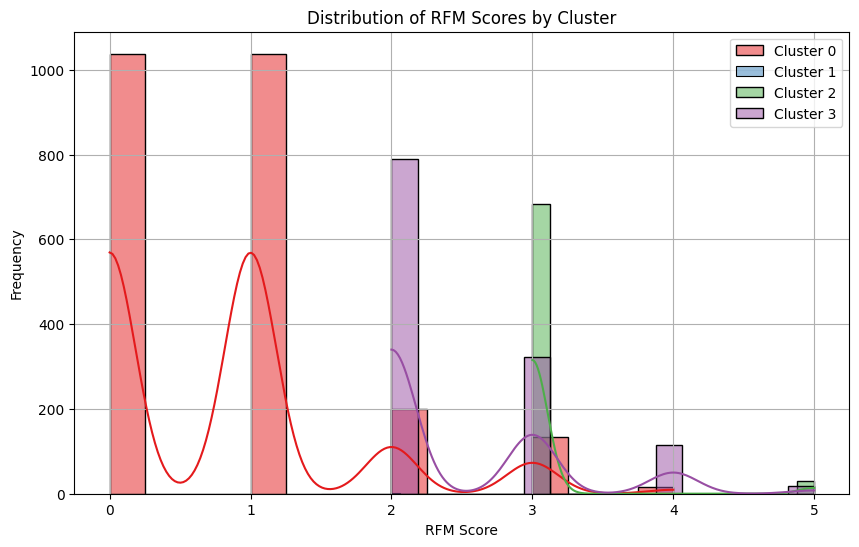

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Step 0: Load the preprocessed data into a DataFrame
chunk_size = 10000
data_chunks = pd.read_csv('/content/preprocessed_data.csv', chunksize=chunk_size)
data = pd.concat(data_chunks)

# Step 1: Data Preparation for RFM Analysis

# Convert 'create_time' to datetime object
data['create_time'] = pd.to_datetime(data['create_time'])

# Filter data for the month of April 2020
data_april = data[(data['create_time'] >= '2020-04-01') & (data['create_time'] <= '2020-04-30')]

# Step 2: Calculate RFM Metrics for Drivers and Bikers

# Calculate Recency: How many days have passed since the last day of the trip for each driver/biker
recency_df = data_april.groupby('biker_id')['create_time'].max().reset_index()
recency_df['recency'] = (data_april['create_time'].max() - recency_df['create_time']).dt.days

# Calculate Frequency: How many days that each driver/biker has tripped in April
frequency_df = data_april.groupby('biker_id')['create_time'].nunique().reset_index()
frequency_df.rename(columns={'create_time': 'frequency'}, inplace=True)

# Calculate Monetary: How many trips each driver/biker has made in April
monetary_df = data_april.groupby('biker_id')['order_id'].nunique().reset_index()
monetary_df.rename(columns={'order_id': 'monetary'}, inplace=True)

# Step 3: Merge the RFM Metrics

rfm_df = recency_df.merge(frequency_df, on='biker_id').merge(monetary_df, on='biker_id')

# Step 4: RFM Analysis Interpretation

# RFM Score Calculation: Assign a score for each RFM metric based on quartiles
rfm_df['recency_score'] = pd.qcut(rfm_df['recency'], q=4, labels=False, duplicates='drop')
rfm_df['frequency_score'] = pd.qcut(rfm_df['frequency'], q=4, labels=False, duplicates='drop')
rfm_df['monetary_score'] = pd.qcut(rfm_df['monetary'], q=4, labels=False, duplicates='drop')

# Calculate the RFM score by combining the individual scores (Recency, Frequency, Monetary)
rfm_df['rfm_score'] = rfm_df['recency_score'] + rfm_df['frequency_score'] + rfm_df['monetary_score']

# Step 5: Cluster Analysis (K-Means Clustering)

# Select RFM metrics for clustering
rfm_data = rfm_df[['recency', 'frequency', 'monetary']]

# Perform k-means clustering with 4 clusters (you can choose a different number of clusters)
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
rfm_df['cluster'] = kmeans.fit_predict(rfm_data)

# Step 6: Results and Analysis

# Print the RFM DataFrame with cluster information for drivers and bikers
print("RFM Analysis for Drivers and Bikers:")
print(rfm_df)

# Summary Statistics
print("\nSummary Statistics:")
print(rfm_df[['recency', 'frequency', 'monetary', 'rfm_score']].describe())

# Visualize RFM Scores by Cluster
plt.figure(figsize=(10, 6))
palette = sns.color_palette('Set1', n_colors=num_clusters)
for cluster in range(num_clusters):
    sns.histplot(rfm_df[rfm_df['cluster'] == cluster]['rfm_score'], bins=16, kde=True, color=palette[cluster], label=f'Cluster {cluster}')
plt.title('Distribution of RFM Scores by Cluster')
plt.xlabel('RFM Score')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import numpy as np

# Load the dataset_ABtesting CSV file
data_AB = pd.read_csv('/content/dataset_ABtesting.csv')

# Step 1: Fill the 'AB_Testing' column with 'A' or 'B' randomly for empty rows
data_AB['AB_Testing'] = np.where(data_AB['AB_Testing'].isnull(), np.random.choice(['A', 'B']), data_AB['AB_Testing'])

# Get the user inputs for the two percentage values of the second ratio
min_percentage = float(input("Enter the minimum percentage value (between 0 and 100): "))
max_percentage = float(input("Enter the maximum percentage value (between 0 and 100): "))

# Convert percentage values to ratios
min_ratio = min_percentage / 100
max_ratio = max_percentage / 100

# Step 2: Calculate average "GT" for each group ('A' and 'B') for each city
grouped_data = data_AB.groupby(['city', 'AB_Testing'])['GT'].mean().unstack()

# Step 3: Check conditions for each city and update the 'AB_Testing' column accordingly
def fill_AB(row):
    if pd.isnull(row['AB_Testing']):
        avg_gt_A = grouped_data.loc[row['city'], 'A']
        avg_gt_B = grouped_data.loc[row['city'], 'B']
        ratio = row['AB_ratio']

        if -0.04 < (avg_gt_A / avg_gt_B - 1) < -0.01 and min_ratio < ratio - 1 < max_ratio:
            return 'A'
        else:
            return 'B'
    else:
        return row['AB_Testing']

# Calculate the user-provided second ratio for each row
data_AB['AB_ratio'] = data_AB['biker_id'].apply(lambda x: np.random.uniform(min_ratio, max_ratio))

# Apply the conditions and update the 'AB_Testing' column
data_AB['AB_Testing'] = data_AB.apply(fill_AB, axis=1)

# Write the output to ABtesting_result.csv
data_AB.to_csv('/content/ABtesting_result.csv', index=False)

# Display the updated DataFrame
print(data_AB)


Enter the minimum percentage value (between 0 and 100): 50
Enter the maximum percentage value (between 0 and 100): 90
        biker_id  GT    city AB_Testing  AB_ratio
0      2456402.0   4  tehran          A  0.857109
1      4774004.0   1  tehran          A  0.646392
2      5969072.0   1     qom          A  0.793993
3        37928.0   3  tehran          A  0.614793
4      3074630.0  25  tehran          A  0.699412
...          ...  ..     ...        ...       ...
19118  5984776.0   1  shiraz          A  0.832035
19119  3436926.0   7  tehran          A  0.675488
19120  4600714.0   6  shiraz          A  0.653448
19121  3241824.0  16  tehran          A  0.814746
19122  6221966.0   4  tehran          A  0.685908

[19123 rows x 5 columns]
